### Problem Statement

Heights and weights of students in  a University have been presented to the IT Department. As the Data Scientist of the school, develop a machine learning model that can classify the sex of a student. The model should predict whether a student will be male or female. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv(filepath_or_buffer='C:\\Users\\user\\PycharmProjects\\sex_classification\\sex_height_weight.csv')

In [3]:
data.head()

,Sex,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.isnull().any()

Sex       False
Height    False
Weight    False
dtype: bool

<AxesSubplot:>

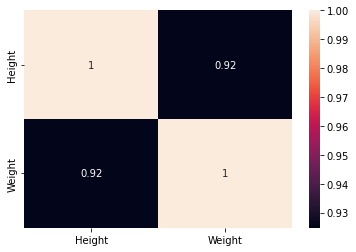

In [6]:
sns.heatmap(data.corr(), annot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

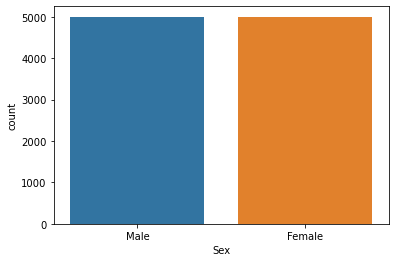

In [7]:
sns.countplot(data['Sex'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

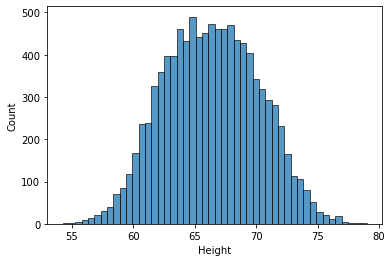

In [8]:
# Checking for outliers in data

sns.histplot(data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

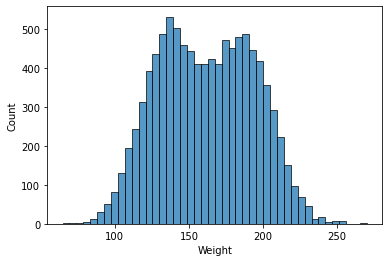

In [9]:
sns.histplot(data['Weight'])

#### Both variables have been distributed evenly

In [10]:
# feature encoding
dict = {'Male':0, 'Female':1 }
data['Sex'] = data['Sex'].map(dict)

In [11]:
data.head()

,Sex,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = data['Sex']
x = data.drop('Sex', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [15]:
from xgboost import XGBClassifier

In [16]:
model = XGBClassifier()

In [17]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(X_test)
print()
print(y_pred)

         Height      Weight
2313  67.581127  180.853936
5065  63.914432  131.513705
3734  68.486951  181.500789
9997  63.867992  128.475319
3776  67.457133  167.554496
...         ...         ...
5543  64.818078  151.493587
9694  66.272240  142.945959
9196  63.698748  130.611194
9656  63.106326  136.589973
4009  69.957342  191.495527

[2500 rows x 2 columns]

[0 1 0 ... 1 1 0]


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
print(accuracy_score(y_pred, y_test) * 100)

91.03999999999999


In [23]:
confusion_matrix(y_pred, y_test)

array([[1137,  121],
       [ 103, 1139]], dtype=int64)

#### The model has an accuracy score of 91% after evaluating and a confusion matrix that predicted (11137, 1139) correctly. 
    True positive results are 1137, False positives are 103, True negative are 1139 and false negatives are 121)

In future, the sensitivity of this model will be measured. This is the number of true positive predictions